<a href="https://colab.research.google.com/github/sanskarpyml/ASL-Detection-model/blob/main/Asl_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
kaggle_credentials =  json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 92% 965M/1.03G [00:08<00:02, 41.1MB/s]
100% 1.03G/1.03G [00:08<00:00, 125MB/s]


In [ ]:
with ZipFile('asl-alphabet.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
import os
import shutil
import random

# ✅ Original dataset path
original_data_path = "/content/asl_alphabet_train/asl_alphabet_train"  # <-- Make sure this is correct

# ✅ New dataset path in Colab
limited_data_path = "/content/asl_alphabet_1000"
os.makedirs(limited_data_path, exist_ok=True)

# ✅ New dataset path in Google Drive
drive_save_path = "/content/drive/MyDrive/ASL_Datasets/asl_alphabet_1000"
os.makedirs("/content/drive/MyDrive/ASL_Datasets", exist_ok=True)

In [ ]:
for class_name in os.listdir(original_data_path):
    class_path = os.path.join(original_data_path, class_name)
    new_class_path = os.path.join(limited_data_path, class_name)

    if os.path.isdir(class_path):
        os.makedirs(new_class_path, exist_ok=True)

        # Randomly select 1000 images
        images = os.listdir(class_path)
        selected_images = random.sample(images, 1000)

        for img in selected_images:
            src = os.path.join(class_path, img)
            dst = os.path.join(new_class_path, img)
            shutil.copyfile(src, dst)

print("✅ Copied 1000 images per class to:", limited_data_path)

✅ Copied 1000 images per class to: /content/asl_alphabet_1000


In [ ]:
print(os.listdir("/content/asl_alphabet_1000"))

['M', 'Z', 'J', 'X', 'G', 'O', 'Q', 'R', 'V', 'F', 'H', 'space', 'A', 'Y', 'D', 'L', 'W', 'U', 'K', 'del', 'nothing', 'P', 'I', 'B', 'S', 'C', 'T', 'E', 'N']


In [ ]:
print(len(os.listdir("/content/asl_alphabet_1000")))

29


In [ ]:
print(len(os.listdir("/content/asl_alphabet_1000/A")))
print(len(os.listdir("/content/asl_alphabet_1000/B")))
print(len(os.listdir("/content/asl_alphabet_1000/C")))
print(len(os.listdir("/content/asl_alphabet_1000/D")))
print(len(os.listdir("/content/asl_alphabet_1000/E")))

1000
1000
1000
1000
1000


In [ ]:
dataset_path = "/content/asl_alphabet_1000"

(200, 200, 3)


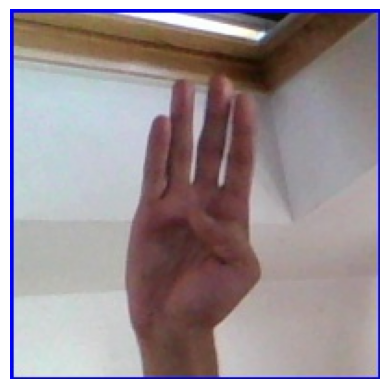

In [ ]:
image_path = '/content/asl_alphabet_1000/B/B1006.jpg'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Image size and batch
img_size = (200, 200)
batch_size = 32

In [ ]:
# Training and validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [ ]:
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 23200 images belonging to 29 classes.


In [ ]:
val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)

Found 5800 images belonging to 29 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')  # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,764,253 (33.43 MB)

 Trainable params: 8,764,253 (33.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("asl_best_model.h5", save_best_only=True, monitor='val_accuracy')

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


724/725 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2985 - loss: 2.4513

725/725 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.2991 - loss: 2.4490 - val_accuracy: 0.4505 - val_loss: 1.8471
Epoch 2/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8515 - loss: 0.4608

725/725 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - accuracy: 0.8515 - loss: 0.4607 - val_accuracy: 0.5645 - val_loss: 1.4309
Epoch 3/20
724/725 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9374 - loss: 0.1880

725/725 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.9374 - loss: 0.1880 - val_accuracy: 0.6353 - val_loss: 1.5105
Epoch 4/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9589 - loss: 0.1286 - val_accuracy: 0.6253 - val_loss: 1.6373
Epoch 5/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9664 - loss: 0.1021 - val_accuracy: 0.6343 - val_loss: 1.6736
Epoch 6/20
725/725 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9721 - loss: 0.0871

725/725 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.9721 - loss: 0.0871 - val_accuracy: 0.6583 - val_loss: 1.4828
Epoch 7/20
724/725 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9817 - loss: 0.0607

725/725 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.9817 - loss: 0.0607 - val_accuracy: 0.6691 - val_loss: 1.4687


In [ ]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"🧮 Final Validation Loss: {val_loss:.4f}")

182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6113 - loss: 1.3817

✅ Final Validation Accuracy: 56.45%
🧮 Final Validation Loss: 1.4309


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np

def load_and_preprocess_image(img_path, target_size=(200, 200)):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [ ]:
import tensorflow as tf
import json

def predict_image(model, img_array, class_map):
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    class_name = class_map[str(predicted_index)]
    confidence = float(np.max(predictions)) * 100

    return class_name, confidence


In [ ]:
# Load your trained model
#model = tf.keras.models.load_model("asl_final_model.h5")

# Load class mapping from JSON
with open("class_names.json", "r") as f:
    class_map = json.load(f)

# Path to your test image
test_image_path = "/content/asl_alphabet_test/asl_alphabet_test/space_test.jpg"

# Preprocess and predict
img_array = load_and_preprocess_image(test_image_path)
predicted_class, confidence = predict_image(model, img_array, class_map)

print(f"Predicted ASL Letter: {predicted_class} ({confidence:.2f}% confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted ASL Letter: space (100.00% confidence)


In [ ]:
# Define save path
save_path = "/content/drive/MyDrive/ASL_Model/asl_final_model.h5"

# Save model
model.save(save_path)

print(f"Model saved to: {save_path}")


Model saved to: /content/drive/MyDrive/ASL_Model/asl_final_model.h5
